In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 시각화를 위한 seaborn 폰트설정
plt.rcParams['axes.unicode_minus'] = False
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

## 데이터 불러오기

In [3]:
entry_data = pd.read_csv("entry_data.csv")
sales_data = pd.read_csv("sales_data.csv")
item_data = pd.read_csv("item_data.csv")
item_entry_data = pd.read_csv("item_entry_data.csv")

In [4]:
print(entry_data.info())
entry_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB
None


,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263


In [5]:
print(sales_data.info())
sales_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1), object(7)
memory usage: 444.2+ KB
None


,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507


In [6]:
print(item_data.info())
item_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      174 non-null    int64 
 1   분류      174 non-null    object
 2   상품명     174 non-null    object
 3   판매금액    174 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.6+ KB
None


,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"


In [7]:
print(item_entry_data.info())
item_entry_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      34 non-null     int64 
 1   분류      34 non-null     object
 2   상품명     34 non-null     object
 3   판매금액    34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB
None


,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"


## 데이터 분석하기

* 필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)
* 월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.
* 힌트: groupby() 함수를 사용하세요.

In [8]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data["결제일시"].apply(lambda x: x[:7])
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [9]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var["결제금액"] = temp_var["결제금액"].str.replace(",","")
# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = temp_var['결제금액'].astype('int')
# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var.groupby('date')['결제금액'].sum().reset_index()
payment_data

,date,결제금액
0,2021-02,7000
1,2021-03,2104500
2,2021-04,3116600
3,2021-05,2537000
4,2021-06,3621500
5,2021-07,1215000
6,2021-08,1229000
7,2021-09,1197500
8,2021-10,2138500
9,2021-11,2748500


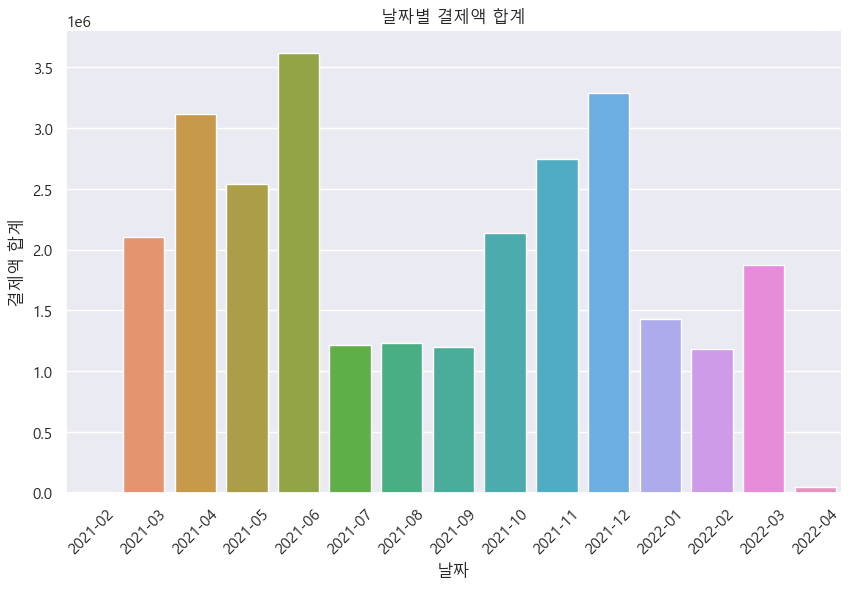

In [10]:
# 집계 결과를 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_data, x='date', y='결제금액')
plt.xlabel('날짜')
plt.ylabel('결제액 합계')
plt.xticks(rotation=45)
plt.title('날짜별 결제액 합계')
plt.show()

* 필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.)
* 여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
* 힌트: value_counts() 함수를 사용하세요.

In [11]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
temp_var = temp_var[temp_var['판매수량'] > -1]
x = temp_var['상품명'].value_counts()
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(x)
temp_item = items_count.head(10)
temp_item

,count
상품명,
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246


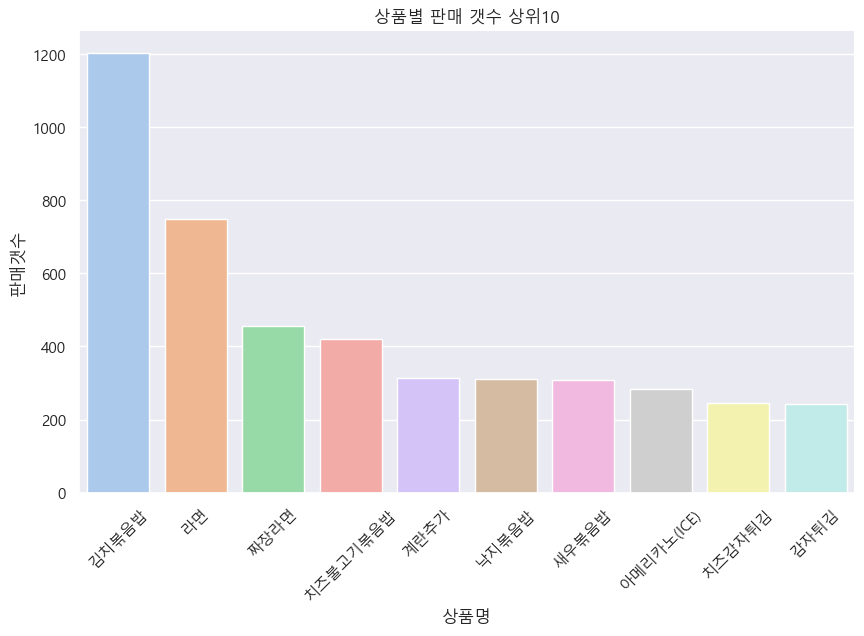

In [12]:
# 집계 결과 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_item, x=temp_item.index, y='count')
plt.xlabel('상품명')
plt.ylabel('판매갯수')
plt.xticks(rotation=45)
plt.title('상품별 판매 갯수 상위10')
plt.show()

In [13]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = temp_var.groupby('상품명')['결제금액'].sum().reset_index()
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.sort_values(by='결제금액', ascending=False).reset_index(drop=True)
temp_payment = items_payment.head(10)
temp_payment

,상품명,결제금액
0,김치볶음밥,6004400
1,라면,2941500
2,치즈불고기볶음밥,2292600
3,짜장라면,2038500
4,낙지볶음밥,1710700
5,새우볶음밥,1539800
6,치즈감자튀김,1354200
7,감자튀김,1083800
8,아메리카노(ICE),1058100
9,불닭볶음면,693000


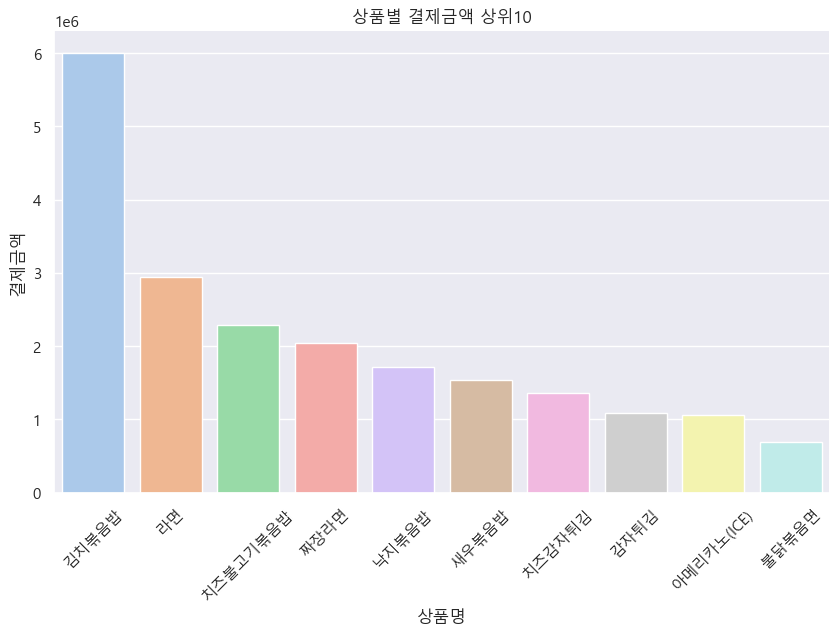

In [14]:
# 집계 결과 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_payment, x='상품명', y='결제금액')
plt.xlabel('상품명')
plt.ylabel('결제금액')
plt.xticks(rotation=45)
plt.title('상품별 결제금액 상위10')
plt.show()

* 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)
* 여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
* 힌트: value_counts() 함수를 사용하세요.

In [16]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [19]:
# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype('int')
# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets= temp_var.groupby('요금제명')['금액'].sum().reset_index()
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
temp_tickets = tickets.sort_values(by='금액', ascending=False).reset_index(drop=True).head(10)
temp_tickets

,요금제명,금액
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


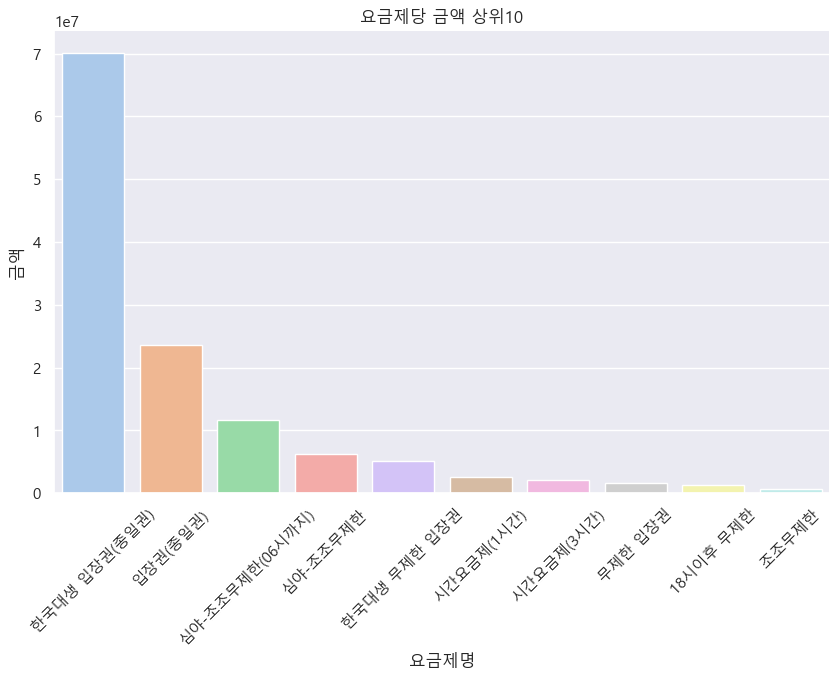

In [20]:
# 집계 결과 시각화하기
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_tickets, x='요금제명', y='금액')
plt.xlabel('요금제명')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.title('요금제당 금액 상위10')
plt.show()